<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [2]:
!nvidia-smi

Sat Jan 25 11:30:03 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install TensorFlow and TensorFlow Model Garden

In [3]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0 (from 0)
Receiving objects: 100% (2650/2650), 34.02 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [4]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 319.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 34.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
# from official.nlp import optimization

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.17.1
Eager mode:  True
Hub version:  0.16.1
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [3]:
import pandas as pd
df = pd.read_csv('data_text_clean.csv')
df = df[['cleaned_posts','EI_encoded']]
df.head()

,cleaned_posts,EI_encoded
0,moment sportscenter top ten play prank,1.0
1,lifechanging experience life,1.0
2,repeat today,1.0
3,may perc experience immerse,1.0
4,last thing friend posted facebook committing ...,1.0


<Axes: title={'center': 'Target Distribution'}, ylabel='Frequency'>

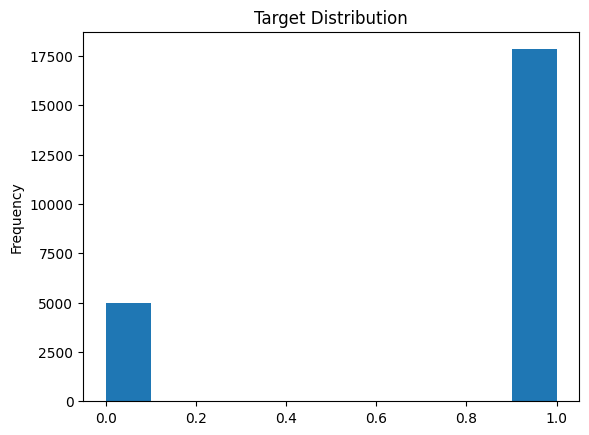

In [5]:
df.EI_encoded.plot(kind='hist', title='Target Distribution')

In [7]:
df = df.dropna(subset=['EI_encoded'])


In [8]:
from sklearn.model_selection import train_test_split

train_df, remaining = train_test_split(df, random_state=42, train_size=0.0075, stratify=df.EI_encoded.values)
valid_df, _ = train_test_split(remaining, random_state=42, train_size=0.00075, stratify=remaining.EI_encoded.values)
train_df.shape, valid_df.shape

((171, 2), (16, 2))

In [9]:
print(train_df['cleaned_posts'].dtypes)
print(train_df['EI_encoded'].dtypes)


object
float64


In [10]:
print(train_df['cleaned_posts'].isnull().sum())  # Check for missing values
print(train_df['cleaned_posts'].apply(lambda x: isinstance(x, str)).all())  # Check if all entries are strings


0
True


In [11]:
train_df.loc[:, 'cleaned_posts'] = train_df['cleaned_posts'].astype(str)  # Convert all to strings
train_df = train_df.copy()  # Make a copy of the DataFrame to avoid SettingWithCopyWarning
train_df['cleaned_posts'] = train_df['cleaned_posts'].astype(str)  # Convert all to strings


In [12]:
print(train_df['EI_encoded'].unique())
print(train_df['EI_encoded'].dtype)


[0. 1.]
float64


In [13]:
train_df['EI_encoded'] = train_df['EI_encoded'].astype(int)
train_df = train_df.copy()
train_df['EI_encoded'] = train_df['EI_encoded'].astype(int)
# Convert the 'posts' column to string type
train_df['cleaned_posts'] = train_df['cleaned_posts'].astype(str)
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df['cleaned_posts'].values, train_df['EI_encoded'].values))
  valid_data = tf.data.Dataset.from_tensor_slices((train_df['cleaned_posts'].values, train_df['EI_encoded'].values))
  for text,label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'apparently god burning people alive fire heaven wasnt enough convince everyone could possibly could remove every shadow doubt say sincerity', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
with tf.device('/cpu:0'):


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [14]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

 # Label categories
 # maximum length of (token) input sequences
label_list = [0,1]
max_seq_length = 128
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)


In [15]:
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [16]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [17]:
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None,
                                            text_a = text.numpy(),
                                            text_b = None,
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                                       max_seq_length, tokenizer)
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)



You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [18]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])
  x = {
      "input_word_ids": input_ids,
      "input_mask": input_mask,
      "segment_ids": segment_ids
  }
  return (x, label_id)




## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [19]:
with tf.device('cpu:0'):
  train_data = train_data.map(to_feature_map,
                                num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                          .shuffle(1000) \
                          .batch(32, drop_remainder=True) \
                          .prefetch(tf.data.experimental.AUTOTUNE)
  valid_data = valid_data.map(to_feature_map,
                                num_parallel_calls=tf.data.experimental.AUTOTUNE) \
                            .batch(32, drop_remainder=True) \
                            .prefetch(tf.data.experimental.AUTOTUNE)


## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

## Task 10: Fine-Tune BERT for Text Classification

In [20]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model

# Define max sequence length
max_seq_length = 128

# Create a custom Keras layer to wrap the TFBertModel
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = TFBertModel.from_pretrained("bert-base-uncased")

    def call(self, inputs):
        input_word_ids, input_mask, segment_ids = inputs
        bert_output = self.bert_model(
            input_ids=input_word_ids,  # No need for tf.identity here
            attention_mask=input_mask,  # No need for tf.identity here
            token_type_ids=segment_ids   # No need for tf.identity here
        )
        return bert_output.pooler_output  # Return the pooled output

def create_model():
    # Define input layers
    input_word_ids = Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

    # Create an instance of the custom BertLayer
    bert_layer = BertLayer()(inputs=[input_word_ids, input_mask, segment_ids])
    #bert_layer = BertLayer()([input_word_ids, input_mask, segment_ids])

    # Add dropout layer
    dropout = Dropout(0.4)(bert_layer)

    # Add a dense layer for binary classification
    output = Dense(1, activation="sigmoid", name="output")(dropout)

    # Create the model
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=output)
    return model

model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.AUC(), 'accuracy'] # Add 'binary_accuracy' here
)

model.summary()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_word_ids            │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_mask (InputLayer)   │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_ids (InputLayer)  │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ input_word_ids[0][0],  │
│                           │                        │                │ input_mask[0][0],      │
│                           │                        │                │ segment_ids[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 768)            │              0 │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │            769 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

## Task 11: Evaluate the BERT Text Classification Model

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4256 - auc: 0.4792 - loss: 0.8181 - val_accuracy: 0.3063 - val_auc: 0.5062 - val_loss: 0.7436
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 520ms/step - accuracy: 0.4942 - auc: 0.4649 - loss: 0.8139 - val_accuracy: 0.3063 - val_auc: 0.4993 - val_loss: 0.7329
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 522ms/step - accuracy: 0.5028 - auc: 0.5336 - loss: 0.7577 - val_accuracy: 0.3063 - val_auc: 0.5106 - val_loss: 0.7227


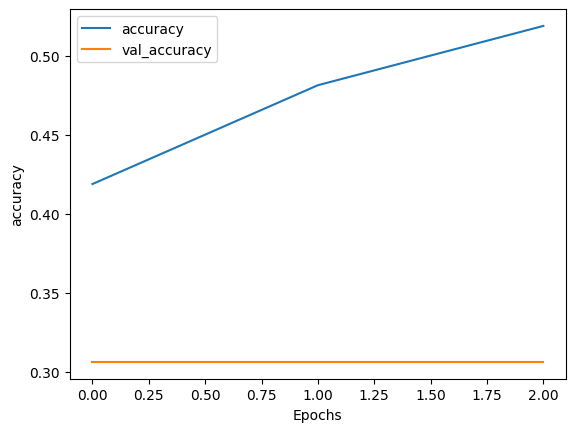

In [22]:
history1 = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=3)
plot_graphs(history1, 'accuracy')  # Ch

In [23]:
# Save the trained model
model.save('my_model_EI_clean.keras')

## Extovert -- GPT


In [27]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download
import nltk
def process_text(text):
    # Download necessary NLTK data files
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt_tab')
    # Initialize necessary resources
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # List of MBTI types to remove
    mbti_types = ['infj', 'intj', 'enfp', 'entp', 'infp', 'intp', 'entj', 'istj',
                  'isfj', 'esfp', 'esfj', 'isfp', 'estj', 'estp', 'istp', 'enfj']
    mbti_pattern = r'\b(?:' + '|'.join(mbti_types) + r')\b'

    # Cleaning steps
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords & lemmatize
    cleaned_text = ' '.join(tokens)

    # Remove MBTI types
    cleaned_text = re.sub(mbti_pattern, '', cleaned_text, flags=re.IGNORECASE).strip()

    return cleaned_text

In [28]:
import tensorflow as tf

sample_example = [
    "I feel most energized when I’m surrounded by people and engaging in lively conversations.",
    "Networking events are my favorite opportunities to meet new people and share ideas.",
    "I love being the one to plan gatherings and ensure everyone is having a great time.",
    "Brainstorming sessions with a group always lead to the best and most creative ideas.",
    "I thrive in environments where I can collaborate and interact with others.",
    "Meeting new people and learning about their stories always excites me.",
    "I can’t imagine spending an entire weekend alone—I need to be out and about.",
    "I enjoy speaking up in meetings and contributing to the discussion.",
    "Exploring new places with friends is much more fun than going alone.",
    "I find energy in being the center of attention and making others laugh or smile."
]


cleaned_examples = [process_text(text) for text in sample_example]
test_data = tf.data.Dataset.from_tensor_slices((cleaned_examples, [0] * len(cleaned_examples)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5

extrovert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'E':
        extrovert_score += 1

print(f"\nTotal Extrovert Predictions (E): {extrovert_score}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Sentence 1: I feel most energized when I’m surrounded by people and engaging in lively conversations.
Prediction: I, Score: 0.41361114382743835
Sentence 2: Networking events are my favorite opportunities to meet new people and share ideas.
Prediction: E, Score: 0.6105591058731079
Sentence 3: I love being the one to plan gatherings and ensure everyone is having a great time.
Prediction: I, Score: 0.49210068583488464
Sentence 4: Brainstorming sessions with a group always lead to the best and most creative ideas.
Prediction: I, Score: 0.4701605439186096
Sentence 5: I thrive in environments where I can collaborate and interact with others.
Prediction: E, Score: 0.6105591058731079
Sentence 6: Meeting new people and learning about their stories always excites me.
Prediction: I, Score: 0.35235562920570374
Sentence 7: I can’t imagine spending an entire weekend alone—I need to be out and about.
Prediction: I, Score: 0.4572673439979553
Sentence 8: I enjoy 

Introvert -GPT

In [29]:
import tensorflow as tf

sample_example = [
    "I feel most energized when I’m surrounded by people and engaging in lively conversations.",
    "Networking events are my favorite opportunities to meet new people and share ideas.",
    "I love being the one to plan gatherings and ensure everyone is having a great time.",
    "Brainstorming sessions with a group always lead to the best and most creative ideas.",
    "I thrive in environments where I can collaborate and interact with others.",
    "Meeting new people and learning about their stories always excites me.",
    "I can’t imagine spending an entire weekend alone—I need to be out and about.",
    "I enjoy speaking up in meetings and contributing to the discussion.",
    "Exploring new places with friends is much more fun than going alone.",
    "I find energy in being the center of attention and making others laugh or smile."
]

cleaned_examples = [process_text(text) for text in sample_example]
test_data = tf.data.Dataset.from_tensor_slices((cleaned_examples, [0] * len(cleaned_examples)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5
introvert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'I':
        extrovert_score += 1

print(f"\nTotal Introvert Predictions (I): {introvert_score}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] 

Sentence 1: I feel most energized when I’m surrounded by people and engaging in lively conversations.
Prediction: I, Score: 0.41361114382743835
Sentence 2: Networking events are my favorite opportunities to meet new people and share ideas.
Prediction: E, Score: 0.6105591058731079
Sentence 3: I love being the one to plan gatherings and ensure everyone is having a great time.
Prediction: I, Score: 0.49210068583488464
Sentence 4: Brainstorming sessions with a group always lead to the best and most creative ideas.
Prediction: I, Score: 0.4701605439186096
Sentence 5: I thrive in environments where I can collaborate and interact with others.
Prediction: E, Score: 0.6105591058731079
Sentence 6: Meeting new people and learning about their stories always excites me.
Prediction: I, Score: 0.35235562920570374
Sentence 7: I can’t imagine spending an entire weekend alone—I need to be out and about.
Prediction: I, Score: 0.4572673439979553
Sentence 8: I enjoy speaking up in meetings and contributing

### Extrovert Gemini

In [30]:
import tensorflow as tf

sample_example = [
    "I thrive in social situations and enjoy being around people.",
    "I find energy in interacting with others and feel drained when alone for too long.",
    "I'm often the life of the party and enjoy being the center of attention.",
    "I prefer to work in teams and enjoy collaborating on projects.",
    "I'm outgoing and have a wide circle of friends and acquaintances.",
    "I express myself openly and enjoy sharing my thoughts and feelings with others.",
    "I find it easy to strike up conversations with strangers.",
    "I prefer to process information by talking it out with others.",
    "I get bored easily when I'm not engaged in social activities.",
    "I often find myself drawn to careers that involve interacting with people."
]


cleaned_examples = [process_text(text) for text in sample_example]
test_data = tf.data.Dataset.from_tensor_slices((cleaned_examples, [0] * len(cleaned_examples)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5

extrovert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'E':
        extrovert_score += 1

print(f"\nTotal Extrovert Predictions (E): {extrovert_score}")

 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sentence 1: I thrive in social situations and enjoy being around people.
Prediction: E, Score: 0.6105591058731079
Sentence 2: I find energy in interacting with others and feel drained when alone for too long.
Prediction: I, Score: 0.4572673439979553
Sentence 3: I'm often the life of the party and enjoy being the center of attention.
Prediction: E, Score: 0.6105591058731079
Sentence 4: I prefer to work in teams and enjoy collaborating on projects.
Prediction: I, Score: 0.4661395251750946
Sentence 5: I'm outgoing and have a wide circle of friends and acquaintances.
Prediction: I, Score: 0.4701605439186096
Sentence 6: I express myself openly and enjoy sharing my thoughts and feelings with others.
Prediction: I, Score: 0.4701605439186096
Sentence 7: I find it easy to strike up conversations with strangers.
Prediction: I, Score: 0.4661395251750946
Sentence 8: I prefer to process information by talking it out with others.
Prediction: E, Score: 0.610559

## introvert Gemini

In [31]:
import tensorflow as tf

sample_example = [
    "I gain energy from spending time alone and find social situations draining.",
    "I prefer to work independently and find it difficult to concentrate in noisy environments.",
    "I enjoy deep conversations with a few close friends rather than large gatherings.",
    "I need quiet time to recharge after social interactions.",
    "I prefer to express myself through writing or other creative outlets.",
    "I find it difficult to small talk and prefer meaningful conversations.",
    "I often need time to process information before sharing my thoughts.",
    "I value my alone time and find it essential for my well-being.",
    "I prefer to work on projects in a quiet and distraction-free environment.",
    "I find it easier to connect with people on a deeper level in one-on-one settings."
]

cleaned_examples = [process_text(text) for text in sample_example]
test_data = tf.data.Dataset.from_tensor_slices((cleaned_examples, [0] * len(cleaned_examples)))
test_data = test_data.map(to_feature_map).batch(1)
preds = model.predict(test_data)
threshold_value = 0.5
introvert_score = 0
for idx, pred in enumerate(preds):
    label = 'E' if pred >= threshold_value else 'I'
    print(f"Sentence {idx + 1}: {sample_example[idx]}")
    print(f"Prediction: {label}, Score: {pred[0]}")
    if label == 'I':
        extrovert_score += 1

print(f"\nTotal Introvert Predictions (I): {introvert_score}")


 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Sentence 1: I gain energy from spending time alone and find social situations draining.
Prediction: I, Score: 0.49385562539100647
Sentence 2: I prefer to work independently and find it difficult to concentrate in noisy environments.
Prediction: I, Score: 0.4851977825164795
Sentence 3: I enjoy deep conversations with a few close friends rather than large gatherings.
Prediction: I, Score: 0.35235562920570374
Sentence 4: I need quiet time to recharge after social interactions.
Prediction: I, Score: 0.49210068583488464
Sentence 5: I prefer to express myself through writing or other creative outlets.
Prediction: I, Score: 0.4661395251750946
Sentence 6: I find it difficult to small talk and prefer meaningful conversations.
Prediction: I, Score: 0.47112876176834106
Sentence 7: I often need time to process information before sharing my thoughts.
Prediction: I, Score: 0.47112876176834106
Sentence 8: I value my alone time and find it essential for my well-

In [34]:
!git config --global user.name "NourBesrour"
!git config --global user.email "nourbesrour29@gmail.com"


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
!git init

Reinitialized existing Git repository in /content/.git/


In [41]:
import os
from google.colab import drive

drive.mount('/content/drive')  # Mount your Google Drive

# Change directory to your desired location
# For example:
os.chdir('/content/drive/My Drive/Colab Notebooks')

# Now list the files
files = os.listdir()
for file in files:
    if file == 'BERT_Finetuning_EI_cleaneddata.ipynb':
        print(f"Found: {file}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found: BERT_Finetuning_EI_cleaneddata.ipynb


In [44]:
!git add BERT_Finetuning_EI_cleaneddata.ipynb
# Add other files if necessary: !git add data.csv images/*

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [35]:
!git init
!git add BERT_Finetuning_EI_cleaneddata.ipynb
!git add my_model_EI_clean.keras
!git add data_text_clean.csv
!git commit -m "EI_cleaned"
!git branch -M main
!git remote add origin https://github.com/NourBesrour/Research_MBTI.git
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
fatal: pathspec 'BERT_Finetuning_EI_cleaneddata.ipynb' did not match any files
[master (root-commit) 0fe6a25] EI_cleaned
 2 files changed, 409564 insertions(+)
 create mode 100644 data_text_clean.csv
 create mode 100644 my_model_EI_clean.keras
fatal: could not read Username for 'https://github.com': No such device or address
